# Intro

This notebook serves to plot some examples of the EDA signals

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set plt font to latex
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

small_fontsize: int = 14 
medium_fontsize: int = 18
large_fontsize: int = 20

plt.rc('font', size=small_fontsize)          # controls default text sizes
plt.rc('axes', titlesize=medium_fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=large_fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_fontsize)    # legend fontsize
plt.rc('figure', titlesize=large_fontsize)  # fontsize of the figure title

In [4]:
user: str = "s045"
left_path: str = f"../data.nosync/usilaughs/filtered_standardized_bilateral/left/EDA/{user}.parquet"
right_path: str = f"../data.nosync/usilaughs/filtered_standardized_bilateral/right/EDA/{user}.parquet"
diff_path: str = f"../data.nosync/usilaughs/filtered_standardized_bilateral/diff/EDA/{user}.parquet"

data_left = pd.read_parquet(left_path)
data_right = pd.read_parquet(right_path)
data_diff = pd.read_parquet(diff_path)


data_left = {key: val.reset_index(drop=False) for key, val in data_left.items()}
data_right = {key: val.reset_index(drop=False) for key, val in data_right.items()}
data_diff = {key: val.reset_index(drop=False) for key, val in data_diff.items()}

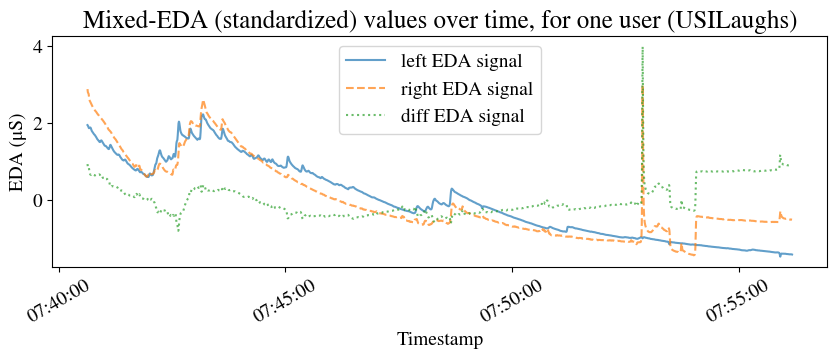

In [17]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,3))

plt.plot(data_left['mixed-EDA']['timestamp'].values, 
         data_left['mixed-EDA']['mixed-EDA'].values, 
         '-', label='left EDA signal', alpha=0.7)

plt.plot(data_right['mixed-EDA']['timestamp'].values, 
         data_right['mixed-EDA']['mixed-EDA'].values, 
         '--', label='right EDA signal', alpha=0.7)

plt.plot(data_diff['mixed-EDA']['timestamp'].values, 
         data_diff['mixed-EDA']['mixed-EDA'].values, 
         ':', label='diff EDA signal', alpha=0.7)

timeFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(timeFmt)

plt.xticks(rotation=30)
plt.legend()
plt.xlabel("Timestamp")
plt.ylabel("EDA (μS)")
plt.title("Mixed-EDA (standardized) values over time, for one user (USILaughs)")
plt.savefig("../final_visualizations/example_eda.pdf", bbox_inches='tight')
plt.show()

,session,timestamp,mixed-EDA
0,experiment,2018-06-15 09:40:38+02:00,1.949451
1,experiment,2018-06-15 09:40:38.250000+02:00,1.942284
2,experiment,2018-06-15 09:40:38.500000+02:00,1.935888
3,experiment,2018-06-15 09:40:38.750000+02:00,1.928291
4,experiment,2018-06-15 09:40:39+02:00,1.916254
...,...,...,...
3727,experiment,2018-06-15 09:56:09.750000+02:00,-1.410764
3728,experiment,2018-06-15 09:56:10+02:00,-1.411165
3729,experiment,2018-06-15 09:56:10.250000+02:00,-1.411344
3730,experiment,2018-06-15 09:56:10.500000+02:00,-1.412433
